In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [170]:
# Try using a different encoding, such as 'ISO-8859-1'
df = pd.read_csv('/Users/changyin/Downloads/TMDB_movie_dataset_v11.csv', encoding='ISO-8859-1')

# Your subsequent code
horror_movies = df[df['genres'].str.contains('Horror', na=False)]
scifi_movies = df[df['genres'].str.contains('Science Fiction', na=False)]
action_movies = df[df['genres'].str.contains('Action', na=False)]
comedy_movies = df[df['genres'].str.contains('Comedy', na=False)]
romance_movies = df[df['genres'].str.contains('Romance', na=False)]

In [6]:
selected_columns = ['id', 'title', 'release_date','genres']
new_df = df[selected_columns]

new_df.to_csv('path_to_new_file.csv', index=False)
new_df

,id,title,release_date,genres
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure"
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction"
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller"
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction"
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure"
...,...,...,...,...
963747,646135,Sweet as Sugar,2018-11-25,NaN
963748,646136,Urban Constellation,2015-05-17,NaN
963749,646137,Cosmic Anxiety,2015-07-23,NaN
963750,646138,Pozolli,2019-10-17,NaN


In [10]:
# Create a copy of the DataFrame to avoid modifying the original one
new_df = new_df.copy()

# Convert the 'release_date' column to datetime
new_df['release_date'] = pd.to_datetime(new_df['release_date'])

# Extract the year from the 'release_date' column and create a new 'release_year' column
new_df['release_year'] = new_df['release_date'].dt.year

new_df

,id,title,release_date,genres,release_year
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure",2010.0
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction",2014.0
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller",2008.0
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",2009.0
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure",2012.0
...,...,...,...,...,...
963747,646135,Sweet as Sugar,2018-11-25,NaN,2018.0
963748,646136,Urban Constellation,2015-05-17,NaN,2015.0
963749,646137,Cosmic Anxiety,2015-07-23,NaN,2015.0
963750,646138,Pozolli,2019-10-17,NaN,2019.0


In [14]:
#fill year = Na as -1
import numpy as np
new_df['release_year'] = new_df['release_year'].fillna(-1)

# Convert to int (this will also convert the NaN placeholders to int)
new_df['release_year'] = new_df['release_year'].astype(int)

# Drop rows where 'genre' column is NaN
new_df = new_df.dropna(subset=['genres'])

new_df

,id,title,release_date,genres,release_year
0,27205,Inception,2010-07-15,"Action, Science Fiction, Adventure",2010
1,157336,Interstellar,2014-11-05,"Adventure, Drama, Science Fiction",2014
2,155,The Dark Knight,2008-07-16,"Drama, Action, Crime, Thriller",2008
3,19995,Avatar,2009-12-15,"Action, Adventure, Fantasy, Science Fiction",2009
4,24428,The Avengers,2012-04-25,"Science Fiction, Action, Adventure",2012
...,...,...,...,...,...
963734,646126,Coming Home,2015-05-24,Drama,2015
963735,646117,Weaver's Crossing,2015-01-24,Drama,2015
963737,646120,O Show da Luna â Das Ilhas ao Continente,2019-08-20,Animation,2019
963744,646131,The Silent Caller,2019-05-29,Crime,2019


In [18]:
## Filter the DataFrame to include only movies from 1980 to 2022
filtered_df = new_df[(new_df['release_year'] >= 1980) & (new_df['release_year'] <= 2022)]

horror_movies_new = filtered_df[filtered_df['genres'].str.contains('Horror', na=False)]

grouped_horror=horror_movies_new.groupby('release_year')

# Group by the release year
grouped_df = filtered_df.groupby('release_year')

#counting the number of movies per year
movies_per_year = grouped_df.size()
horror_per_year=grouped_horror.size()

# Displaying the result
print(movies_per_year)

release_year
1980     3558
1981     3618
1982     3719
1983     3811
1984     3880
1985     4013
1986     4175
1987     4349
1988     4425
1989     4636
1990     4445
1991     4422
1992     4460
1993     4390
1994     4510
1995     4617
1996     4539
1997     4942
1998     4988
1999     5245
2000     5462
2001     6000
2002     6599
2003     7273
2004     8091
2005     8883
2006     9849
2007    10203
2008    10851
2009    11474
2010    11852
2011    13117
2012    14201
2013    15801
2014    17075
2015    18352
2016    19348
2017    22322
2018    23556
2019    26270
2020    25716
2021    27940
2022    28719
dtype: int64


In [17]:
print(horror_per_year)

release_year
1980     209
1981     247
1982     232
1983     195
1984     180
1985     241
1986     246
1987     354
1988     438
1989     439
1990     371
1991     320
1992     297
1993     267
1994     244
1995     270
1996     285
1997     273
1998     295
1999     345
2000     380
2001     379
2002     448
2003     493
2004     610
2005     667
2006     807
2007     846
2008     860
2009     926
2010     941
2011    1064
2012    1189
2013    1308
2014    1556
2015    1656
2016    1728
2017    1980
2018    2051
2019    2218
2020    2431
2021    2412
2022    2744
dtype: int64


In [19]:
# Calculate the ratio of horror movies per year
horror_ratio_per_year = (horror_per_year / movies_per_year)*100

# Displaying the result
print('Ratio of Horror Movies Per Year:')
print(horror_ratio_per_year)

Ratio of Horror Movies Per Year:
release_year
1980    5.874087
1981    6.826976
1982    6.238236
1983    5.116767
1984    4.639175
1985    6.005482
1986    5.892216
1987    8.139802
1988    9.898305
1989    9.469370
1990    8.346457
1991    7.236545
1992    6.659193
1993    6.082005
1994    5.410200
1995    5.847953
1996    6.278916
1997    5.524079
1998    5.914194
1999    6.577693
2000    6.957159
2001    6.316667
2002    6.788907
2003    6.778496
2004    7.539241
2005    7.508725
2006    8.193725
2007    8.291679
2008    7.925537
2009    8.070420
2010    7.939588
2011    8.111611
2012    8.372650
2013    8.277957
2014    9.112738
2015    9.023540
2016    8.931156
2017    8.870173
2018    8.706911
2019    8.443091
2020    9.453259
2021    8.632785
2022    9.554650
dtype: float64


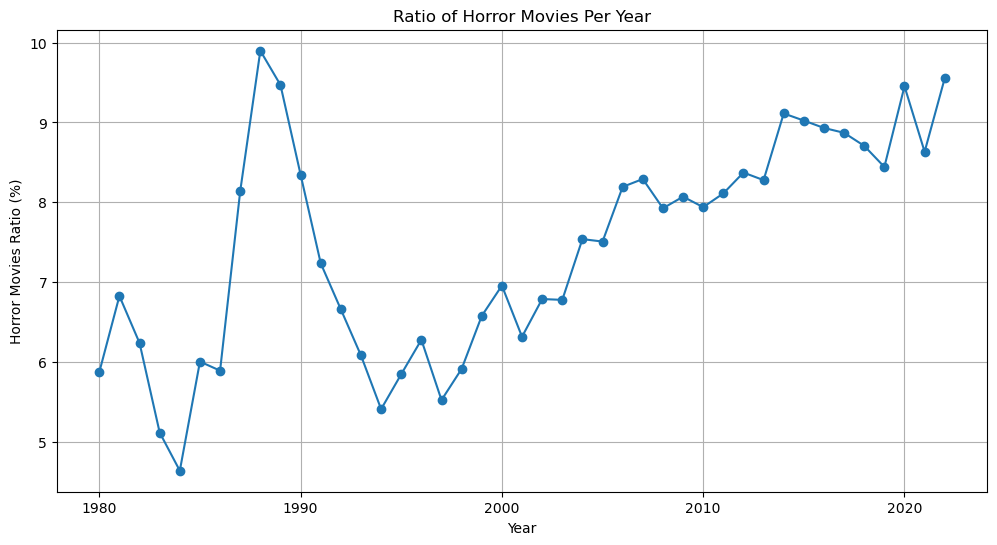

In [20]:
import matplotlib.pyplot as plt

# Assuming horror_ratio_per_year is already calculated

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(horror_ratio_per_year, marker='o')  # 'o' adds markers to each data point

# Adding title and labels
plt.title('Ratio of Horror Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Horror Movies Ratio (%)')

# Optionally, you can add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()


In [22]:
df_economy=pd.read_csv('/Users/changyin/Downloads/Economy of the United States.csv')
df_economy

,Unnamed: 0,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP)
0,0,1980,2857.3,12552.9,2857.3,12552.9,-0.30%,13.50%,7.20%,NaN
1,1,1981,3207.0,13948.7,3207.0,13948.7,2.50%,10.40%,7.60%,NaN
2,2,1982,3343.8,14405.0,3343.8,14405.0,-1.80%,6.20%,9.70%,NaN
3,3,1983,3634.0,15513.7,3634.0,15513.7,4.60%,3.20%,9.60%,NaN
4,4,1984,4037.7,17086.4,4037.7,17086.4,7.20%,4.40%,7.50%,NaN
5,5,1985,4339.0,18199.3,4339.0,18199.3,4.20%,3.50%,7.20%,NaN
6,6,1986,4579.6,19034.8,4579.6,19034.8,3.50%,1.90%,7.00%,NaN
7,7,1987,4855.3,20001.0,4855.3,20001.0,3.50%,3.60%,6.20%,NaN
8,8,1988,5236.4,21376.0,5236.4,21376.0,4.20%,4.10%,5.50%,NaN
9,9,1989,5641.6,22814.1,5641.6,22814.1,3.70%,4.80%,5.30%,NaN


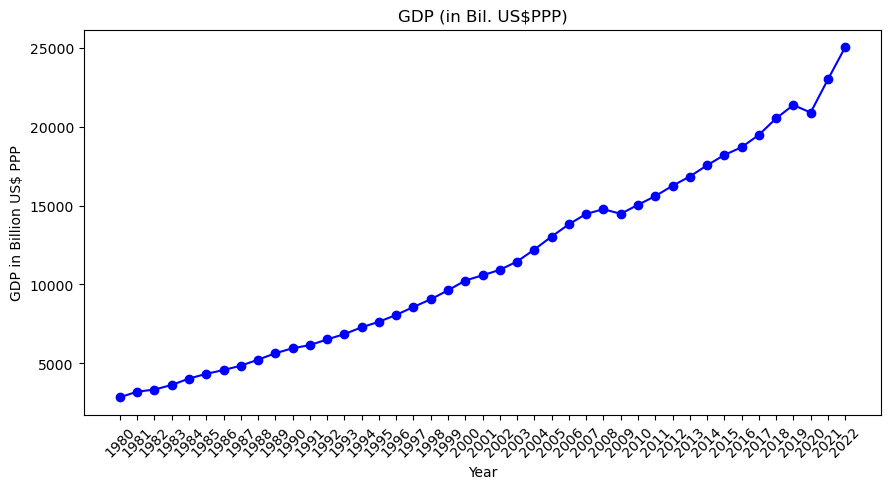

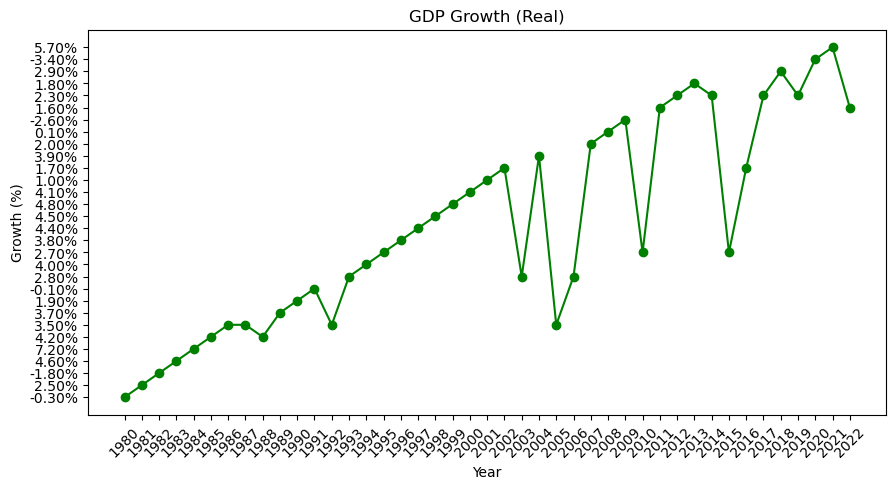

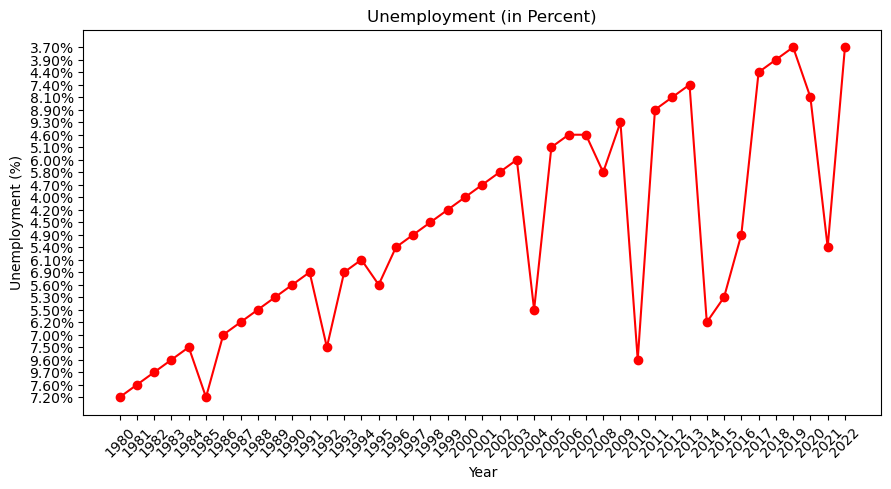

In [24]:
df_filtered = df_economy[(df_economy['Year'] >= 1980) & (df_economy['Year'] <= 2022)]

# Plotting
plt.figure(figsize=(35, 5))

# GDP (in Bil. US$PPP)
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.plot(df_filtered['Year'], df_filtered['GDP (in Bil. US$PPP)'], marker='o', color='b')
plt.title('GDP (in Bil. US$PPP)')
plt.xlabel('Year')
plt.ylabel('GDP in Billion US$ PPP')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

plt.figure(figsize=(35, 5))
# GDP growth (real)
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.plot(df_filtered['Year'], df_filtered['GDP growth (real)'], marker='o', color='g')
plt.title('GDP Growth (Real)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

plt.figure(figsize=(35, 5))
# Unemployment (in Percent)
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.plot(df_filtered['Year'], df_filtered['Unemployment (in Percent)'], marker='o', color='r')
plt.title('Unemployment (in Percent)')
plt.xlabel('Year')
plt.ylabel('Unemployment (%)')
plt.xticks(df_filtered['Year'], rotation=45)
plt.show()

In [94]:
data = pd.read_excel('/Users/changyin/Downloads/growth_data.xlsx')
data

,Year,GDP growth,horror,percent,Unemployment Rate
0,1980,-0.003,5.87,0.0587,0.072
1,1981,0.025,6.83,0.0683,0.076
2,1982,-0.018,6.24,0.0624,0.097
3,1983,0.046,5.12,0.0512,0.096
4,1984,0.072,4.64,0.0464,0.075
5,1985,0.042,6.00,0.0600,0.072
6,1986,0.035,5.89,0.0589,0.070
7,1987,0.035,8.14,0.0814,0.062
8,1988,0.042,9.90,0.0990,0.055
9,1989,0.037,9.50,0.0950,0.053


In [112]:
positive_data = data['GDP growth'] + abs(data['GDP growth'].min()) + 1

# Apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(positive_data)

# Add the transformed data back into DataFrame
data['boxcox_transformed_GDP'] = transformed_data

positive_data = data['percent'] + abs(data['percent'].min()) + 1

# Apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(positive_data)

# Add the transformed data back into DataFrame
data['boxcox_transformed_percent'] = transformed_data

positive_data = data['Unemployment Rate'] + abs(data['Unemployment Rate'].min()) + 1

# Apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(positive_data)

# Add the transformed data back into DataFrame
data['boxcox_transformed_Unemployment_Rate'] = transformed_data

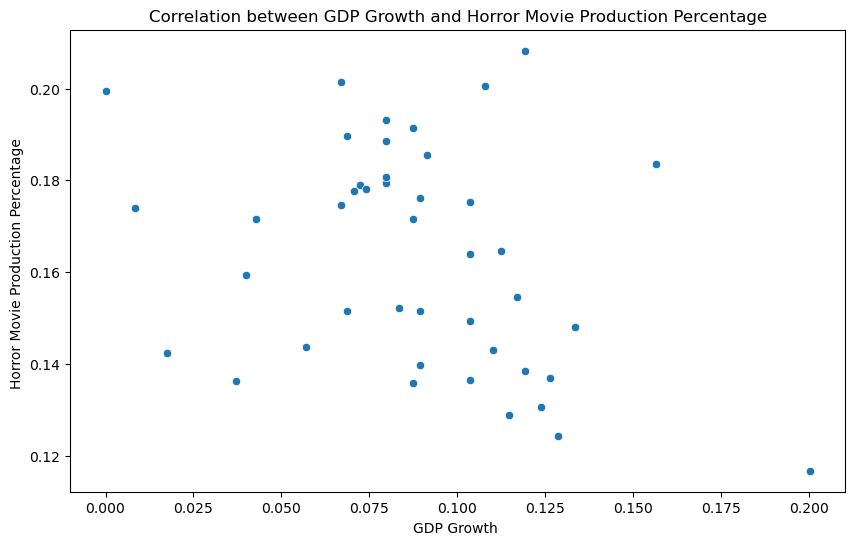

-0.3270923270465558

In [80]:
# Calculating the correlation between GDP growth and horror movie production percentage
correlation = data['boxcox_transformed_GDP'].corr(data['boxcox_transformed_percent'])

# Plotting the relationship between GDP growth and horror movie production percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='boxcox_transformed_GDP', y='boxcox_transformed_percent', data=data)
plt.title('Correlation between GDP Growth and Horror Movie Production Percentage')
plt.xlabel('GDP Growth ')
plt.ylabel('Horror Movie Production Percentage ')
plt.show()

correlation

## Analytical Approach and Methodology

#### The objective is to rigorously test the hypothesis that Gross Domestic Product (GDP) has a negative relationship with the production of horror movies, while accounting for potential confounding variables.

#### 1. Analysis of Variance Test (ANOVA)

#### Purpose: To ascertain if there are statistically significant differences in the production of horror movies across different levels of GDP.

#### Procedure: We will categorize GDP into discrete levels ( low, medium, high) and compare the production of horror movies across these categories using ANOVA.

#### Expected Outcome: Identification of whether variations in GDP categories explain a significant portion of the variance in horror movie production.

#### 2. Tukey's Honestly Significant Difference (HSD) Test

#### Purpose: After identifying significant differences with ANOVA, apply Tukey's HSD test to perform all possible pairwise comparisons, ensuring a thorough exploration of the nuances in the data.

#### Procedure: If the ANOVA indicates significant differences, Tukey's HSD test will be used to tell which specific GDP categories differ from each other. Incorporate visual tools like box plots or confidence interval plots to illustrate the differences between groups, enhancing the interpretability of the results.

#### Expected Outcome: Clarification of which particular pairs of GDP levels are significantly different in terms of horror movie production.

#### 3. Regression Model Building

#### Purpose: To quantitatively assess the relationship between GDP and the production of horror movies.

#### Procedure: 
#### a. Model Specification: Construct a linear regression model with the production of horror movies as the dependent variable and GDP as the independent variable.
#### b. Inclusion of Interaction Terms: Investigate if the interaction between GDP and other variables (e.g., time trends, economic indicators) significantly impacts horror movie production.

#### Model Assessment: Evaluate the model using standard criteria like R-squared, F-statistics, and the significance of coefficients.

#### Expected Outcome: A quantifiable measure of the relationship between GDP and horror movie production, along with an understanding of the impact of interaction terms.

#### 4. Confounder Analysis

#### Purpose: To identify and control for potential confounders that might affect the relationship between GDP and horror movie production.

#### Procedure: Compare the production of horror movies with other genres during the same period. If all movie genres increase or decrease with changes in GDP, the trend might be due to broader industry or economic factors rather than something specific to horror movies.

#### Expected Outcome: A more accurate and reliable understanding of the relationship between GDP and horror movie production, isolated from the effects of confounding variables.

#### 5. Time Series Analysis

#### Purpose: To forecast future values of horror movie production based on historical data, while considering potential trends, cycles, and other temporal dynamics inherent in the time series data.

#### Procedure: 
#### a.Stationarity  confirmation using ACF and PACF
#### b.Fit  ARIMA model
#### c.Use ARIMA to make forecasts over a specified time periods.

#### Expected Outcome:The model should provide insights into potential future trends and allow stakeholders to plan accordingly.

In [114]:
data['GDP_growth_category'] = pd.qcut(data['boxcox_transformed_GDP'], 3, labels=["low", "medium", "high"])
data

,Year,GDP growth,horror,percent,Unemployment Rate,boxcox_transformed_GDP,boxcox_transformed_percent,boxcox_transformed_Unemployment Rate,Year_centered,boxcox_transformed_GDP_centered,boxcox_transformed_Unemployment Rate_centered,GDP_growth_category,boxcox_transformed_Unemployment_Rate
0,1980,-0.003,5.87,0.0587,0.072,0.037093,0.136244,0.043978,-21.0,-0.051245,0.001709,low,0.043978
1,1981,0.025,6.83,0.0683,0.076,0.083440,0.152267,0.044425,-20.0,-0.004898,0.002157,medium,0.044425
2,1982,-0.018,6.24,0.0624,0.097,0.017539,0.142339,0.046299,-19.0,-0.070799,0.004030,low,0.046299
3,1983,0.046,5.12,0.0512,0.096,0.128606,0.124193,0.046225,-18.0,0.040268,0.003957,high,0.046225
4,1984,0.072,4.64,0.0464,0.075,0.200263,0.116690,0.044317,-17.0,0.111925,0.002048,high,0.044317
5,1985,0.042,6.00,0.0600,0.072,0.119210,0.138374,0.043978,-16.0,0.030872,0.001709,high,0.043978
6,1986,0.035,5.89,0.0589,0.070,0.103694,0.136571,0.043741,-15.0,0.015356,0.001473,medium,0.043741
7,1987,0.035,8.14,0.0814,0.062,0.103694,0.175253,0.042700,-14.0,0.015356,0.000431,medium,0.042700
8,1988,0.042,9.90,0.0990,0.055,0.119210,0.208270,0.041650,-13.0,0.030872,-0.000618,high,0.041650
9,1989,0.037,9.50,0.0950,0.053,0.108010,0.200545,0.041324,-12.0,0.019672,-0.000945,high,0.041324


In [105]:
# Perform the ANOVA

model = ols('percent ~ C(GDP_growth_category)', data=data).fit()

anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                          sum_sq    df         F    PR(>F)
C(GDP_growth_category)  0.001204   2.0  3.572633  0.037363
Residual                0.006738  40.0       NaN       NaN


In [182]:
# Perform the HSD

import statsmodels.stats.multicomp as multi

# Perform Tukey's HSD test
tukey = multi.pairwise_tukeyhsd(endog=data['percent'],    
                                groups=data['GDP_growth_category'],   # Groups
                                alpha=0.05)                # Significance level

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low   0.0125 0.0311   0.001  0.024   True
  high medium   0.0053 0.5661 -0.0073  0.018  False
   low medium  -0.0071 0.3131 -0.0189 0.0046  False
---------------------------------------------------


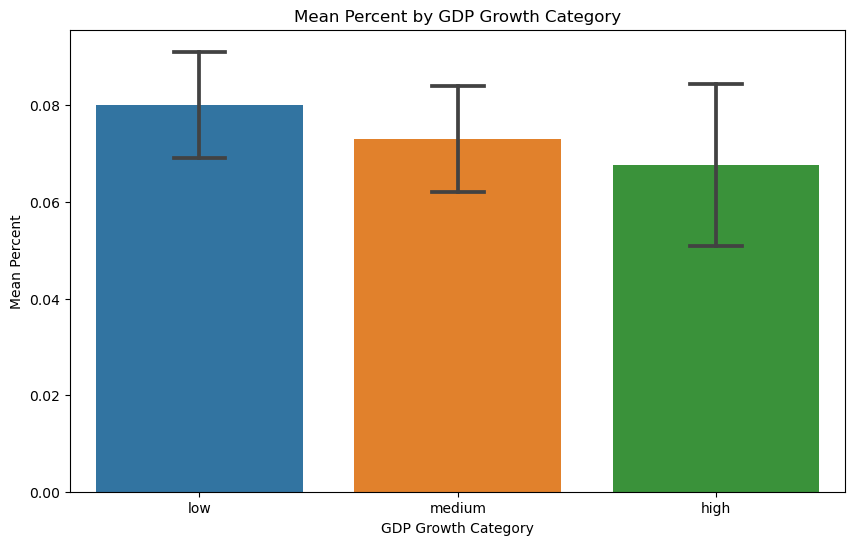

In [184]:
#plot for comparsion

plt.figure(figsize=(10, 6))

# Create a bar plot with standard deviation error bars
sns.barplot(x='GDP_growth_category', y='percent', data=data, errorbar='sd', capsize=0.2)

# Adding titles and labels
plt.title('Mean Percent by GDP Growth Category')
plt.xlabel('GDP Growth Category')
plt.ylabel('Mean Percent')

plt.show()

In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
#regression model

In [130]:
# Start with a simple model
simple_model = ols('boxcox_transformed_percent ~ boxcox_transformed_GDP_centered + boxcox_transformed_Unemployment_Rate_centered', data=data).fit()
print(simple_model.summary())


                                OLS Regression Results                                
Dep. Variable:     boxcox_transformed_percent   R-squared:                       0.227
Model:                                    OLS   Adj. R-squared:                  0.188
Method:                         Least Squares   F-statistic:                     5.864
Date:                        Sat, 09 Dec 2023   Prob (F-statistic):            0.00585
Time:                                14:45:06   Log-Likelihood:                 105.34
No. Observations:                          43   AIC:                            -204.7
Df Residuals:                              40   BIC:                            -199.4
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [195]:
# Centering the continuous variables
data['Year_centered'] = data['Year'] - data['Year'].mean()
data['boxcox_transformed_GDP_centered'] = data['boxcox_transformed_GDP'] - data['boxcox_transformed_GDP'].mean()
data['boxcox_transformed_Unemployment_Rate_centered'] = data['boxcox_transformed_Unemployment_Rate'] - data['boxcox_transformed_Unemployment_Rate'].mean()

# Recalculating the model 
model = ols('boxcox_transformed_percent ~ boxcox_transformed_Unemployment_Rate_centered+Year_centered:GDP_growth_category + boxcox_transformed_GDP_centered + GDP_growth_category + GDP_growth_category:boxcox_transformed_GDP_centered', data=data).fit()
print(model.summary())

# calculating VIF
X = data[['Year_centered', 'boxcox_transformed_GDP_centered','boxcox_transformed_Unemployment_Rate_centered']] # add other variables and interaction terms as needed
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                                OLS Regression Results                                
Dep. Variable:     boxcox_transformed_percent   R-squared:                       0.489
Model:                                    OLS   Adj. R-squared:                  0.350
Method:                         Least Squares   F-statistic:                     3.513
Date:                        Sun, 10 Dec 2023   Prob (F-statistic):            0.00380
Time:                                11:56:15   Log-Likelihood:                 114.27
No. Observations:                          43   AIC:                            -208.5
Df Residuals:                              33   BIC:                            -190.9
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:
#VIF looks good
#Significant values are 
#Year_centered:GDP_growth_category[low] 
#Year_centered:GDP_growth_category[medium]

In [ ]:
#The model suggests that there is a more pronounced effect of GDP growth on the percentage of 
#horror movies over time, particularly in years with lower GDP growth. This finding aligns with the hypothesis
#that during times of economic downturn (bad GDP), there might be a higher percentage of horror movies. However, 
#the model also indicates that there are other factors not included in the model that could explain the remaining 
#variance in the percentage of horror movies.

#The significant interaction between 'Year' and GDP growth categories indicates that the effect of GDP on
#the percentage of horror movies changes over time.
#This could be due to various factors evolving over the years, such as technological advancements, 
#changes in movie industry trends, shifts in public interest, or broader economic and social changes.

In [ ]:
#Cofounder Analysis

#different genre: Scifi, Romance

In [173]:
import pandas as pd

scifi_movies_new = filtered_df[filtered_df['genres'].str.contains('Science Fiction', na=False)]
grouped_horror=scifi_movies_new.groupby('release_year')
scifi_per_year=grouped_horror.size()
scifi_percent = (scifi_per_year / movies_per_year)*100

#action_movies_new = filtered_df[filtered_df['genres'].str.contains('Action', na=False)]
#grouped_action=action_movies_new.groupby('release_year')
#action_per_year=grouped_action.size()
#action_percent = (action_per_year / movies_per_year)*100

romance_movies_new = filtered_df[filtered_df['genres'].str.contains('Romance', na=False)]
grouped_romance=romance_movies_new.groupby('release_year')
romance_per_year=grouped_romance.size()
romance_percent = (romance_per_year / movies_per_year)*100

In [179]:
# Add the Series directly to 'data', aligning by row order
data['scifi_percent'] = scifi_percent.reset_index(drop=True)
#data['action_percent']= action_percent.reset_index(drop=True)
data['romance_percent']= romance_percent.reset_index(drop=True)

In [185]:
#Anova for scifi and romance movies

model_scifi = ols('scifi_percent ~ C(GDP_growth_category)', data/=data).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model_scifi, typ=2)

print(anova_results)


                          sum_sq    df         F    PR(>F)
C(GDP_growth_category)  1.879294   2.0  3.798355  0.030879
Residual                9.895303  40.0       NaN       NaN


In [186]:
model_romance = ols('romance_percent ~ C(GDP_growth_category)', data=data).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model_romance, typ=2)

print(anova_results)

                           sum_sq    df         F    PR(>F)
C(GDP_growth_category)   0.996999   2.0  0.569183  0.570504
Residual                35.032610  40.0       NaN       NaN


In [ ]:
# this is good. Differnent generes have differnent anova_results

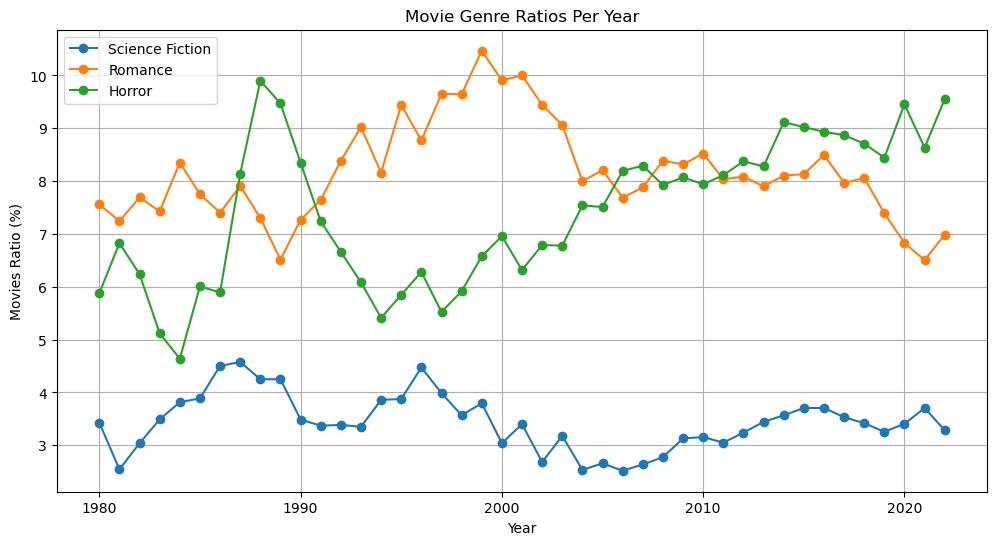

In [193]:
# trend plot for different genres

plt.figure(figsize=(12, 6))

# Plotting each genre
plt.plot(scifi_percent, marker='o', label='Science Fiction')  # 'o' adds markers to each data point
plt.plot(romance_percent, marker='o', label='Romance')
plt.plot(horror_ratio_per_year, marker='o', label='Horror')

# Adding title and labels
plt.title('Movie Genre Ratios Per Year')
plt.xlabel('Year')
plt.ylabel('Movies Ratio (%)')

# Add a legend to distinguish between genres
plt.legend()

# Optionally, you can add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# looks good. They are different

In [ ]:
#Time series

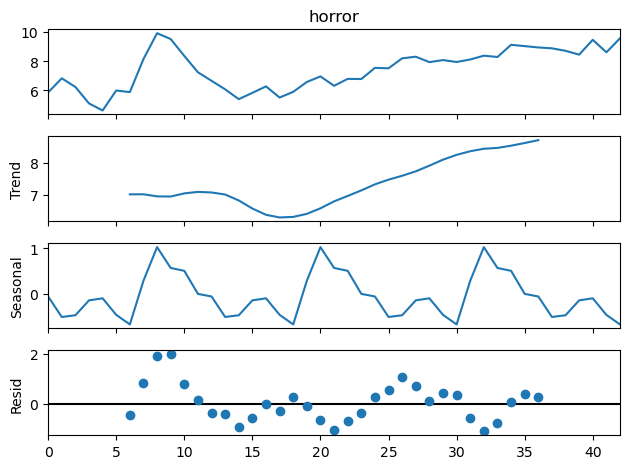

In [201]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = sm.tsa.seasonal_decompose(data['horror'], model='additive', period=12)

decomposition.plot()
plt.show()

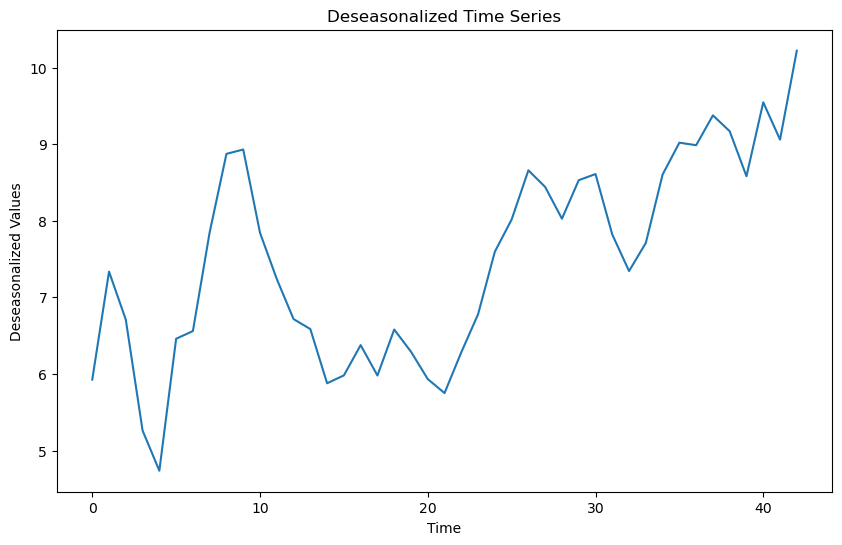

In [202]:
deseasonalized = data['horror'] - decomposition.seasonal
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized)
plt.title('Deseasonalized Time Series')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Values')
plt.show()

In [220]:
#detrending to make it stationary
trend_model = sm.OLS(data['boxcox_transformed_percent'], sm.add_constant(data['Year_centered'])).fit()
data['horror_detrended'] = data['boxcox_transformed_percent'] - trend_model.fittedvalues
result = adfuller(data['horror_detrended'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -3.172350
p-value: 0.021642


In [ ]:
# now the data is stationary

In [ ]:
# Forcast/prediction

<Figure size 1200x600 with 0 Axes>

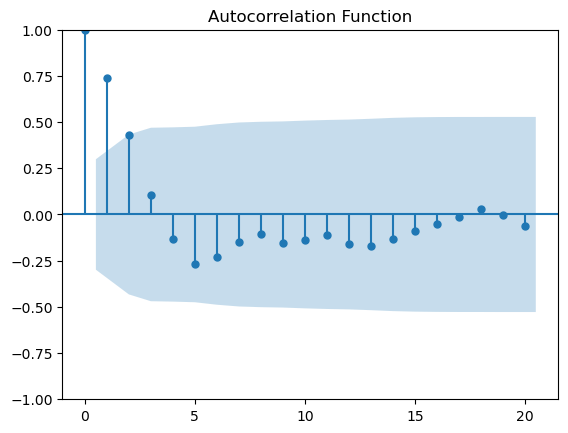

<Figure size 1200x600 with 0 Axes>

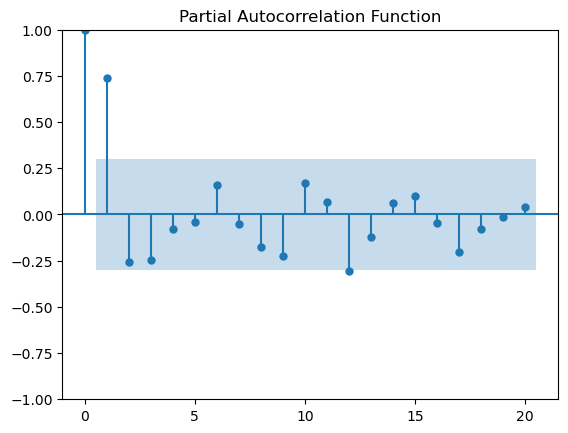

In [222]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(data['horror_detrended'], lags=20, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(data['horror_detrended'], lags=20, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
# we can choose p,d and q to be 1,0,1 for the ARIMA Model

In [223]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model

p, d, q = 1, 0, 1  
arima_model = ARIMA(data['horror_detrended'], order=(p, d, q)).fit()

print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:       horror_detrended   No. Observations:                   43
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 129.568
Date:                Sun, 10 Dec 2023   AIC                           -251.135
Time:                        18:44:59   BIC                           -244.090
Sample:                             0   HQIC                          -248.537
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.008      0.065      0.948      -0.015       0.016
ar.L1          0.6309      0.261      2.421      0.015       0.120       1.142
ma.L1          0.2587      0.213      1.215      0.2

In [224]:
# Forecast future values (let's say we want to forecast the next 10 periods)
forecast = arima_model.get_forecast(steps=10)
predicted_means = forecast.predicted_mean
predicted_conf_int = forecast.conf_int()

# Print the forecast
print(predicted_means)
print(predicted_conf_int)


43    0.012738
44    0.008221
45    0.005371
46    0.003573
47    0.002439
48    0.001723
49    0.001271
50    0.000986
51    0.000806
52    0.000693
Name: predicted_mean, dtype: float64
    lower horror_detrended  upper horror_detrended
43               -0.010318                0.035793
44               -0.022637                0.039079
45               -0.028090                0.038833
46               -0.030870                0.038016
47               -0.032388                0.037265
48               -0.033255                0.036700
49               -0.033767                0.036309
50               -0.034075                0.036048
51               -0.034265                0.035878
52               -0.034382                0.035768


In [226]:
#Reapply the Trend to the Forecast


future_years = np.arange(1, 11) + data['Year_centered'].iloc[-1]  # Adjust the range as needed
future_trend = trend_model.predict(sm.add_constant(future_years))

# Add the trend back to the forecasted values
predicted_with_trend = predicted_means + future_trend
print(predicted_with_trend)


43    0.203442
44    0.200164
45    0.198553
46    0.197994
47    0.198098
48    0.198621
49    0.199409
50    0.200363
51    0.201422
52    0.202547
Name: predicted_mean, dtype: float64
